In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Projections in $R^2$

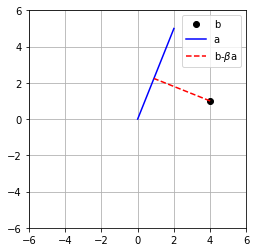

In [2]:
# point b
b = np.array([4,1])

# Line a
a = np.array([2,5])

# calculate beta
beta = (a.T @ b)/(a.T @ a)

# draw
plt.plot(b[0], b[1], "ko", label ="b")
plt.plot([0, a[0]], [0, a[1]], "b", label="a")

# Draw Projction line
plt.plot([b[0], beta*a[0]], [b[1], beta*a[1]], "r--", label=r"b-$\beta$a")
plt.axis("square")
plt.grid()
plt.legend()
plt.axis((-6, 6, -6, 6))
plt.show()

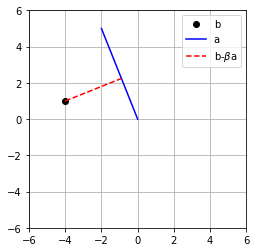

In [3]:
# point b
b = np.array([-4,1])

# Line a
a = np.array([-2,5])

# calculate beta
beta = (a.T @ b)/(a.T @ a)

# draw
plt.plot(b[0], b[1], "ko", label ="b")
plt.plot([0, a[0]], [0, a[1]], "b", label="a")

# Draw Projction line
plt.plot([b[0], beta*a[0]], [b[1], beta*a[1]], "r--", label=r"b-$\beta$a")
plt.axis("square")
plt.grid()
plt.legend()
plt.axis((-6, 6, -6, 6))
plt.show()

## Projection in $R^N$

In [4]:
# define the sizes
m = 16
n = 10

# vector b (16x1)
b = np.random.randn(m,1)

# matrix A (16x10)
A = np.random.randn(m,n)

# Solution 1: Explicit inverse x = inv(A.T@A) * (A.T @ b)
# (10x16)(16x10) = 10x10
# (10x16)(16x1) = 10x1
# finally: (10x10)(10x1) = 10x1
x1 = np.linalg.inv(A.T@A) @ (A.T@b)
x1

array([[-0.26206477],
       [-0.23194686],
       [-0.07442516],
       [-0.18858885],
       [-0.37869236],
       [ 0.22159129],
       [-0.19760914],
       [ 0.12732795],
       [ 0.08392718],
       [ 0.04567212]])

In [5]:
# A better method for python
x2 = np.linalg.solve(A.T@A, A.T@b)
x2

array([[-0.26206477],
       [-0.23194686],
       [-0.07442516],
       [-0.18858885],
       [-0.37869236],
       [ 0.22159129],
       [-0.19760914],
       [ 0.12732795],
       [ 0.08392718],
       [ 0.04567212]])

In [6]:
print(np.round(x1-x2,4))

[[ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [-0.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]]


In [7]:
#Lets use a smaller dimension and visualize it in 3d
m = 3
n = 2

b = np.random.randn(m,1)
A = np.random.randn(m,n)

# Solve for X
x = np.linalg.solve(A.T@A, A.T@b)

# Find the projection of b into A: Ax
Ax = A@x
print(b.T)
print(Ax.T)
# b is not contained in the span of matrix A

[[ 1.64303074 -0.46397462 -0.00607255]]
[[ 0.27725934 -0.77612783  0.36630273]]


/Users/sheraji/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/sheraji/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/stride_tricks.py:341: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array, copy=False, subok=subok)
/Users/sheraji/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lis

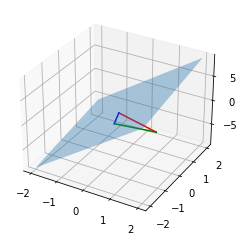

In [8]:
fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.subplot(projection="3d")

# plot the vectors
ax.plot([0, b[0]], [0, b[1]], [0, b[2]], "r")
ax.plot([0, Ax[0]], [0, Ax[1]], [0, Ax[2]], "b")

# projection line
ax.plot([Ax[0][0], b[0]], [Ax[1][0], b[1]], [Ax[2][0], b[2]], "g")

# draw the line
xx,yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0], A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1,alpha=0.4)
plt.show()

## Code Challenge: Vector Decomposition to Components

In [9]:
# W: vector to be decomposed
w = np.array([2,3])

# v: reference vector
v = np.array([4,0])

# w parallel to v
beta = np.dot(v,w)/ (np.dot(v,v))
w_parv = beta*v

# w orthogonal to v
w_perpv = w - w_parv

# Confirm algebraically
print((w_parv + w_perpv) - w)
print()
print(np.dot(w_parv, w_perpv))

[0. 0.]

0.0


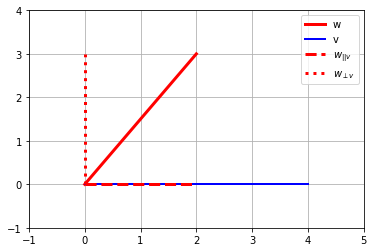

In [10]:
plt.plot([0, w[0]], [0, w[1]], "r", linewidth=3)
plt.plot([0, v[0]], [0, v[1]], "b", linewidth=2)
plt.plot([0, w_parv[0]], [0, w_parv[1]], "r--", linewidth=3)
plt.plot([0, w_perpv[0]], [0, w_perpv[1]], "r:", linewidth=3)
plt.legend(["w", "v", "$w_{|| v}$", "$w_{\perp v}$"])
plt.grid()
plt.axis([-1, 5, -1, 4])
plt.show()

## QR Decomposition

In [11]:
# Use the example from the class
A = np.array([[1,0], [1,0], [0,1]])
A

array([[1, 0],
       [1, 0],
       [0, 1]])

In [12]:
# Carry out full QR Decomposition
Q,R = np.linalg.qr(A, "complete")
print(Q)
print()
print(R)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]

[[-1.41421356  0.        ]
 [ 0.         -1.        ]
 [ 0.          0.        ]]


In [13]:
# Carry out "economy" decomposition (default in python)
Q,R = np.linalg.qr(A)
print(Q)
print()
print(R)

[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]

[[-1.41421356  0.        ]
 [ 0.         -1.        ]]


In [14]:
# Q@R returns A
Q@R

array([[1., 0.],
       [1., 0.],
       [0., 1.]])

In [15]:
# Lets take another example
A = np.array([[1,1,-2], [3,-1,1]])
A

array([[ 1,  1, -2],
       [ 3, -1,  1]])

In [16]:
# QR Decomposition
Q,R = np.linalg.qr(A, "complete")

print("R from QR: {}".format(np.round(R,4)))
print()
print("R from Q.TA: {}".format(np.round(Q.T@A,4)))

R from QR: [[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]

R from Q.TA: [[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


In [17]:
print(Q@R)

[[ 1.  1. -2.]
 [ 3. -1.  1.]]


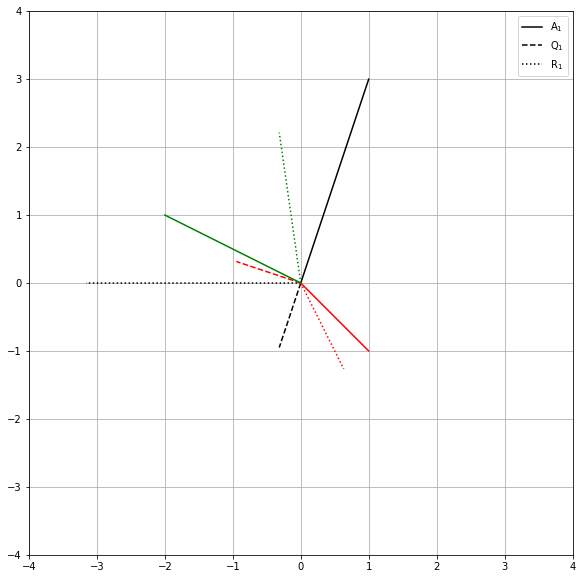

In [18]:
# plot
colors = 'krg'
plt.figure(figsize=(10,10))
for i in range(0,np.shape(A)[1]):
    
    # plot original vector M
    plt.plot([0,A[0,i]],[0,A[1,i]],colors[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colors[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colors[i],linestyle=':')

    
plt.legend(['A$_1$','Q$_1$','R$_1$'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.show()

## Code Challenge: Gram-Schmidt Algorithm

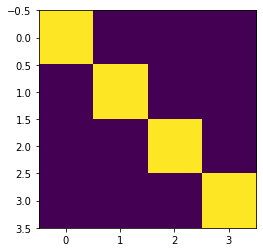

In [19]:
# Check the matlab code for more details
m = 4
n = 4
A = np.random.randn(m,n)
Q = np.zeros((m,n))

# Loop over the columns
for i in range(n):
    
    # Copy matrix columns one-by-one as in GS algorithm
    Q[:,i] = A[:,i]
    a = A[:,i]
    
    # pick the ith column from A matrx as a vector
    
    # Orthogonalize each column with respect to all previous columns
    for j in range(i): # fucking smart here
        q = Q[:,j]
        Q[:,i] = Q[:,i] - (np.dot(a,q)/np.dot(q,q))*q
        
    # Normalize
    Q[:,i] = Q[:,i]/np.linalg.norm(Q[:,i])


plt.imshow(Q.T@Q);

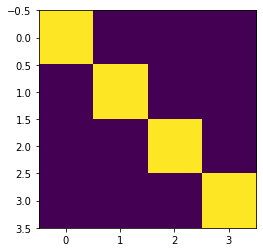

In [20]:
# Tall matrix
m = 6
n = 4
A = np.random.randn(m,n)
Q = np.zeros((m,n))

# Loop over the columns
for i in range(n):
    
    # Copy matrix columns one-by-one as in GS algorithm
    Q[:,i] = A[:,i]
    a = A[:,i]
    
    # pick the ith column from A matrx as a vector
    
    # Orthogonalize each column with respect to all previous columns
    for j in range(i): # fucking smart here
        q = Q[:,j]
        Q[:,i] = Q[:,i] - (np.dot(a,q)/np.dot(q,q))*q
        
    # Normalize
    Q[:,i] = Q[:,i]/np.linalg.norm(Q[:,i])


plt.imshow(Q.T@Q);

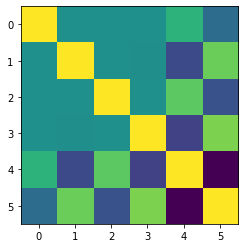

In [21]:
# Wide Matrix
m = 4
n = 6
A = np.random.randn(m,n)
Q = np.zeros((m,n))

# Loop over the columns
for i in range(n):
    
    # Copy matrix columns one-by-one as in GS algorithm
    Q[:,i] = A[:,i]
    a = A[:,i]
    
    # pick the ith column from A matrx as a vector
    
    # Orthogonalize each column with respect to all previous columns
    for j in range(i): # fucking smart here
        q = Q[:,j]
        Q[:,i] = Q[:,i] - (np.dot(a,q)/np.dot(q,q))*q
        
    # Normalize
    Q[:,i] = Q[:,i]/np.linalg.norm(Q[:,i])


plt.imshow(Q.T@Q);

In [22]:
# QR Full decomposition
Q2,R = np.linalg.qr(A, "complete")
np.round(Q2, 3)

array([[-0.211,  0.538, -0.761,  0.296],
       [ 0.559, -0.259, -0.033,  0.787],
       [ 0.5  ,  0.775,  0.377, -0.085],
       [-0.626,  0.206,  0.528,  0.535]])

In [23]:
# QR economy decomposition
Q3,R = np.linalg.qr(A)
np.round(Q3,3)

array([[-0.211,  0.538, -0.761,  0.296],
       [ 0.559, -0.259, -0.033,  0.787],
       [ 0.5  ,  0.775,  0.377, -0.085],
       [-0.626,  0.206,  0.528,  0.535]])

In [24]:
# My decomposition (2 extra rows are repetition)
np.round(Q,3)

array([[ 0.211,  0.538, -0.761, -0.296, -0.436,  0.436],
       [-0.559, -0.259, -0.033, -0.787,  0.436, -0.436],
       [-0.5  ,  0.775,  0.377,  0.085, -0.436,  0.436],
       [ 0.626,  0.206,  0.528, -0.535,  0.655, -0.655]])

## Code Challenge: inverse via QR

In [25]:
# Generate a large matrix and compute the inverse conventionally and by using qr
n = 100
A = np.random.randn(n,n)
A.shape

(100, 100)

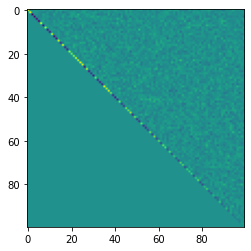

In [26]:
# Use explicit inverse
Ai = np.linalg.inv(A)

# Invert using qr
Q,R = np.linalg.qr(A)
# R expected to be upper-triangular matrix
plt.imshow(R);

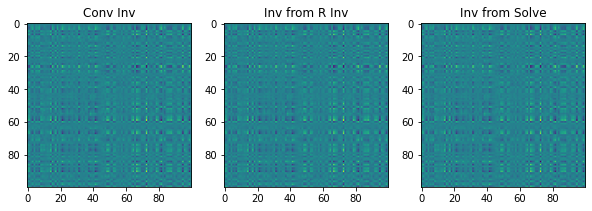

In [27]:
# qr inverse
AiQR1 = np.linalg.inv(R)@Q.T
AiQR2 = np.linalg.solve(R,Q.T)

plt.figure(figsize = (10,10))
plt.subplot(1,3,1)
plt.imshow(Ai)
plt.title("Conv Inv")

plt.subplot(1,3,2)
plt.imshow(AiQR1)
plt.title("Inv from R Inv")

plt.subplot(1,3,3)
plt.imshow(AiQR2)
plt.title("Inv from Solve")
plt.show()

In [28]:
# Flatten the matrices and calculate correlation between them
np.corrcoef((Ai.flatten(), AiQR1.flatten(), AiQR2.flatten()))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Code Challenge: Sherman-Morrison Formula

In [29]:
m = 5
a = np.random.randn(m)
b = np.random.randn(m)

A = np.eye(m) - np.outer(a,b)
Ai = np.eye(m) + np.outer(a,b)/(1 - np.dot(a,b))
# We expect identity matrix (-0 because of rounding errors)
print(np.round(A@Ai,3))

[[ 1.  0. -0. -0. -0.]
 [ 0.  1. -0. -0. -0.]
 [-0. -0.  1.  0.  0.]
 [ 0.  0. -0.  1. -0.]
 [-0. -0.  0.  0.  1.]]


In [30]:
# Case of failure
a = a/np.linalg.norm(a)
b = a # caution: list copying, not affecting in this case

A = np.eye(m) - np.outer(a,b)
Ai = np.eye(m) + np.outer(a,b)/(1 - np.dot(a,b))
# We expect no identity matrix because of zero division, nut it does not 
# necessary becomes NaN as expected because of rounding errors 
print(np.round(A@Ai,3))

[[ 1.02  -0.008 -0.015  0.002  0.021]
 [-0.008  0.934 -0.104 -0.011  0.108]
 [ 0.048  0.021  0.855  0.036 -0.039]
 [ 0.01   0.005  0.036  1.012 -0.017]
 [ 0.006  0.088 -0.051 -0.007  0.903]]


## Code Challenge: Prove $A^TA = R^TR$

In [31]:
# Generate random tall matrix
m = 10
n = 4
A = np.random.randn(m,n)

# QR decomposition
Q,R = np.linalg.qr(A)

# test
np.round(A.T@A - R.T@R,4)

array([[ 0.,  0.,  0., -0.],
       [ 0., -0., -0.,  0.],
       [ 0., -0.,  0., -0.],
       [-0.,  0., -0.,  0.]])

In [32]:
# Generate random wide matrix
m = 4
n = 10
A = np.random.randn(m,n)

# QR decomposition
Q,R = np.linalg.qr(A)

# test
np.round(A.T@A - R.T@R,4)

array([[ 0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.],
       [-0., -0.,  0.,  0.,  0., -0.,  0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.],
       [-0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0.],
       [-0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.],
       [-0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.],
       [ 0., -0., -0.,  0., -0., -0., -0.,  0., -0.,  0.],
       [ 0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.],
       [ 0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.]])